#              ***Machine Learning Freelance Platform Projects***

In [1]:
# importing all neccessary librearies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Reading of the dataset 
df=pd.read_csv("Freelance_Platform_Projects.csv")
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,i need an interactive form building n my site,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,fixed_price,2023-01-30 16:04:50,i want to cllect leads/data on my site. i want...,NaN,2016-05-17,Tadcaster,United Kingdom,GBP,Paid Social Media Manager
1,3D model of BIG MINING MACHINE,Design,Expert ($$$),3D Design,EUR,2007.0,remote,ALL,fixed_price,2023-01-30 16:04:50,"Hi everyone,\ntoday im looking for ""SKILLED"" 3...",NaN,2019-06-05,Ostrava,Czech Republic,USD,indie game and VR company
2,Sales Email Template,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,2023-01-30 15:55:38,Looking for a template that can be used when w...,NaN,2022-12-05,Ardrossan,United Kingdom,GBP,NaN
3,Need Writer to Write a Review Article,Writing & Translation,Entry ($),Content Writing,USD,30.0,remote,ALL,fixed_price,2023-01-30 15:55:38,I need a writer who can able to write a review...,NaN,2014-10-08,Kolkata,India,USD,Blogging | Digital Marketing | SEO
4,I need a 3d work of my house,Design,Intermediate ($$),3D Design,GBP,30.0,remote,ALL,fixed_price,2023-01-30 15:41:40,I require 3d work of my house. 3d plan already...,NaN,2022-01-02,Gloucester,United Kingdom,GBP,NaN


In [3]:
# now we will check the shape and size of the dataset 
print(df.shape)
print(df.size)

(1402, 17)
23834


In [4]:
#calculate all element
df.size

23834

In [5]:
# Now the most important part of machine learning is that to explore the data 
# Before creating any machine learning model it is very important to have 
# the neat and clean data 
# The neat and clean data means such a data which do not have outeliers, skewness,
# null values, and of course, should be numeric in nature 
# so lets move towords Exploratory data analysis

# EXPLORATORY DATA ANALYSIS

In [6]:
# lets do some analysis about out features and their datatypes

df.info()
# A i can see there are 1402 total entries but in two columns namely Duration 
# and Client job title  
# have not equal non_null entries as total entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1402 non-null   object 
 1   Category Name              1402 non-null   object 
 2   Experience                 1402 non-null   object 
 3   Sub Category Name          1402 non-null   object 
 4   Currency                   1402 non-null   object 
 5   Budget                     1402 non-null   float64
 6   Location                   1402 non-null   object 
 7   Freelancer Preferred From  1402 non-null   object 
 8   Type                       1402 non-null   object 
 9   Date Posted                1402 non-null   object 
 10  Description                1402 non-null   object 
 11  Duration                   183 non-null    object 
 12  Client Registration Date   1402 non-null   object 
 13  Client City                1402 non-null   objec

In [7]:
# statistical information 
df.describe()

,Budget
count,1402.000000
mean,163.761056
std,504.577388
min,0.000000
25%,30.000000
50%,80.000000
75%,150.000000
max,10000.000000


In [8]:
# Replace space in underscore 
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['Title', 'Category_Name', 'Experience', 'Sub_Category_Name', 'Currency',
       'Budget', 'Location', 'Freelancer_Preferred_From', 'Type',
       'Date_Posted', 'Description', 'Duration', 'Client_Registration_Date',
       'Client_City', 'Client_Country', 'Client_Currency', 'Client_Job_Title'],
      dtype='object')

In [9]:
#check null values
df.isnull().sum()

Title                           0
Category_Name                   0
Experience                      0
Sub_Category_Name               0
Currency                        0
Budget                          0
Location                        0
Freelancer_Preferred_From       0
Type                            0
Date_Posted                     0
Description                     0
Duration                     1219
Client_Registration_Date        0
Client_City                     0
Client_Country                  0
Client_Currency                 0
Client_Job_Title              838
dtype: int64

In [10]:
# So, there are two such columns which as over 60-70% null values
# so, there is no sense of keeping those columns, so we prefer to 
# delete those columns 

df=df.drop(df[["Duration","Client_Job_Title"]],axis =1)
df.head()

,Title,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Date_Posted,Description,Client_Registration_Date,Client_City,Client_Country,Client_Currency
0,i need an interactive form building n my site,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,fixed_price,2023-01-30 16:04:50,i want to cllect leads/data on my site. i want...,2016-05-17,Tadcaster,United Kingdom,GBP
1,3D model of BIG MINING MACHINE,Design,Expert ($$$),3D Design,EUR,2007.0,remote,ALL,fixed_price,2023-01-30 16:04:50,"Hi everyone,\ntoday im looking for ""SKILLED"" 3...",2019-06-05,Ostrava,Czech Republic,USD
2,Sales Email Template,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,2023-01-30 15:55:38,Looking for a template that can be used when w...,2022-12-05,Ardrossan,United Kingdom,GBP
3,Need Writer to Write a Review Article,Writing & Translation,Entry ($),Content Writing,USD,30.0,remote,ALL,fixed_price,2023-01-30 15:55:38,I need a writer who can able to write a review...,2014-10-08,Kolkata,India,USD
4,I need a 3d work of my house,Design,Intermediate ($$),3D Design,GBP,30.0,remote,ALL,fixed_price,2023-01-30 15:41:40,I require 3d work of my house. 3d plan already...,2022-01-02,Gloucester,United Kingdom,GBP


In [11]:
# now we can see our data does not contain any null values
df.isnull().sum()

Title                        0
Category_Name                0
Experience                   0
Sub_Category_Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer_Preferred_From    0
Type                         0
Date_Posted                  0
Description                  0
Client_Registration_Date     0
Client_City                  0
Client_Country               0
Client_Currency              0
dtype: int64

In [12]:
#check duplicates value
dupl=df[df.duplicated()]
dupl.count()

Title                        0
Category_Name                0
Experience                   0
Sub_Category_Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer_Preferred_From    0
Type                         0
Date_Posted                  0
Description                  0
Client_Registration_Date     0
Client_City                  0
Client_Country               0
Client_Currency              0
dtype: int64

In [13]:
df["Title"].nunique()


1353

In [14]:
df["Description"].nunique()


1368

In [15]:
df=df.drop(df[["Title","Description"]],axis=1)

In [16]:
# now we will check for all data type of all columns 
df.dtypes

Category_Name                 object
Experience                    object
Sub_Category_Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer_Preferred_From     object
Type                          object
Date_Posted                   object
Client_Registration_Date      object
Client_City                   object
Client_Country                object
Client_Currency               object
dtype: object

In [17]:
# As two columns namely Data Posted and Client Registration Date are object but
# actualy should be date time 
# so lets convert it to datetime data
df["Client_Registration_Date"] = pd.to_datetime(df["Client_Registration_Date"])
df["Date_Posted"] = pd.to_datetime(df["Date_Posted"])

In [18]:
# lets do some feature engineering here 
import datetime as dt
df["Day_Registraterd"] = df["Client_Registration_Date"].dt.day
df["Day_Posted"] = df["Date_Posted"].dt.day

In [19]:
df =df.drop(df[["Client_Registration_Date","Date_Posted"]], axis=1)

<AxesSubplot:xlabel='Budget'>

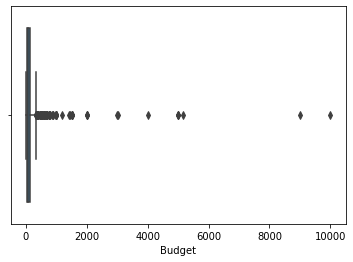

In [20]:
# now we will check for outliers in our data in case of numeric columns 
sns.boxplot(df["Budget"])

In [21]:
# find IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Budget              120.00
Day_Registraterd     16.00
Day_Posted            4.75
dtype: float64


In [22]:
# remove outliers in our data
df=df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df.shape

(1284, 13)

<AxesSubplot:xlabel='Budget'>

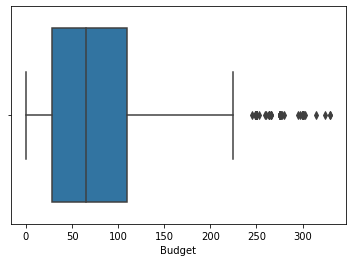

In [23]:
# now we check outliers 
sns.boxplot(df['Budget'])

In [24]:
# set index
df.reset_index()
df= df.reset_index(drop = True)
df.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_Registraterd,Day_Posted
0,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,fixed_price,Tadcaster,United Kingdom,GBP,17,30
1,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,Ardrossan,United Kingdom,GBP,5,30
2,Writing & Translation,Entry ($),Content Writing,USD,30.0,remote,ALL,fixed_price,Kolkata,India,USD,8,30
3,Design,Intermediate ($$),3D Design,GBP,30.0,remote,ALL,fixed_price,Gloucester,United Kingdom,GBP,2,30
4,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,hourly,Leeds,United Kingdom,GBP,11,30


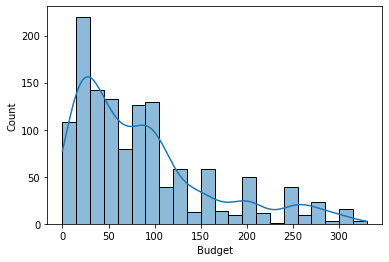

In [25]:
# lets check for skewness in numeric feature
sns.histplot(df["Budget"],kde =True)
plt.show()
# it is highly positive skewed
# so to perform model well it would be better resolve this problem

In [26]:
# removed skewness
df["Budget"]= np.sqrt(df["Budget"])

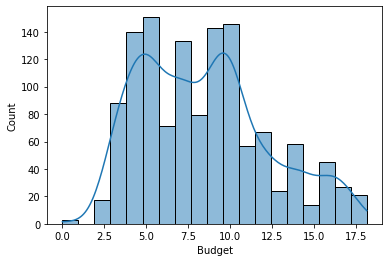

In [27]:
# lets check for skewness in numeric feature
sns.histplot(df["Budget"],kde =True)
plt.show()
#so, now it seems better than previous distribution or skewness problem resolved

In [28]:
#value counts of the budget columns
df["Budget"].value_counts()

10.000000    92
7.071068     80
4.472136     74
3.162278     68
5.477226     62
             ..
7.141428      1
6.928203      1
10.344080     1
14.966630     1
7.810250      1
Name: Budget, Length: 144, dtype: int64

In [29]:
# copy data in new variable 
data=df.copy()

# CLUSTERS OF THE PROJECTS

In [30]:
# seen first five rowes 
data.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_Registraterd,Day_Posted
0,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,fixed_price,Tadcaster,United Kingdom,GBP,17,30
1,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,5.000000,remote,ALL,hourly,Ardrossan,United Kingdom,GBP,5,30
2,Writing & Translation,Entry ($),Content Writing,USD,5.477226,remote,ALL,fixed_price,Kolkata,India,USD,8,30
3,Design,Intermediate ($$),3D Design,GBP,5.477226,remote,ALL,fixed_price,Gloucester,United Kingdom,GBP,2,30
4,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,hourly,Leeds,United Kingdom,GBP,11,30


In [31]:
# As we know any machine learning model only works on numeric data
# so we will convert all categorical collumns into numerical data using 
#lable encoder of sklearn library 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Category_Name']=encoder.fit_transform(data['Category_Name'])
data['Experience']=encoder.fit_transform(data['Experience'])
data['Sub_Category_Name']=encoder.fit_transform(data['Sub_Category_Name'])
data['Currency']=encoder.fit_transform(data['Currency'])
data['Location']=encoder.fit_transform(data['Location'])
data['Freelancer_Preferred_From']=encoder.fit_transform(data['Freelancer_Preferred_From'])
data['Type']=encoder.fit_transform(data['Type'])
data['Client_City']=encoder.fit_transform(data['Client_City'])
data['Client_Country']=encoder.fit_transform(data['Client_Country'])
data['Client_Currency']=encoder.fit_transform(data['Client_Currency'])

data.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_Registraterd,Day_Posted
0,6,0,85,1,4.472136,1,0,0,423,66,1,17,30
1,3,1,67,1,5.000000,1,0,1,14,66,1,5,30
2,8,0,21,2,5.477226,1,0,0,224,25,2,8,30
3,1,2,0,1,5.477226,1,0,0,160,66,1,2,30
4,6,0,85,1,4.472136,1,0,1,238,66,1,11,30


# KMeans Clustering

In [32]:
# we will create clusters of the projects by applying KMeans cluster
x = data.iloc[:,[0,4]].values

In [33]:
from sklearn.cluster import KMeans
wcss_list = []
for i in range(1,11):
    k=KMeans(n_clusters=i,random_state=1)
    k.fit(x)
    wcss_list.append(k.inertia_)


In [34]:
wcss_list

[28693.522207384212,
 16099.4780439866,
 9819.800315813207,
 6603.213288162871,
 4791.114053973585,
 3452.5171314843446,
 2930.7367704985536,
 2435.755121342262,
 2185.7381913847416,
 1935.81144524291]

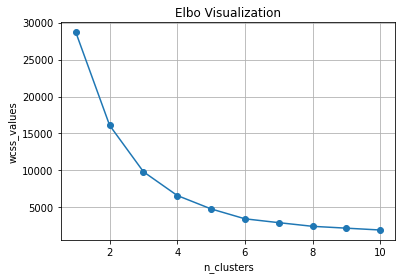

In [35]:
# for declaration of optimum values for number of clusters lets plot the elbow method
# the first sharp bent will give the best value for number of clusters
plt.plot(range(1,11),wcss_list,"o-")
plt.title("Elbo Visualization")
plt.xlabel("n_clusters")
plt.ylabel("wcss_values")
plt.grid()
plt.show()

In [36]:
model= KMeans(n_clusters=4,random_state=1)
pred=model.fit_predict(x)

pred[:5]

array([2, 0, 2, 0, 2], dtype=int32)

In [37]:
model.cluster_centers_

array([[ 0.97050147,  5.34578602],
       [ 6.39545455, 13.10219456],
       [ 6.49575071,  5.76758142],
       [ 1.24462366, 11.0157424 ]])

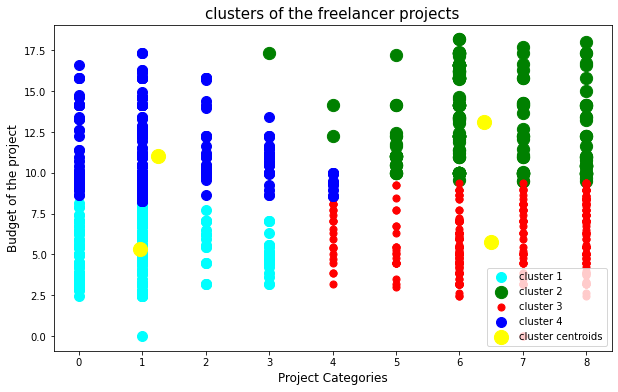

In [38]:
# plot cluster of the frelancer projects
plt.figure(figsize = (10,6))
plt.scatter(x[pred==0,0], x[pred== 0,1], s = 100, c= "cyan", label = "cluster 1")
plt.scatter(x[pred==1,0], x[pred== 1,1], s = 150, c= "green", label = "cluster 2")
plt.scatter(x[pred==2,0], x[pred== 2,1], s = 50, c= "red", label = "cluster 3")
plt.scatter(x[pred==3,0], x[pred== 3,1], s = 100, c= "blue", label = "cluster 4")
plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],s=200,c="yellow",
            label="cluster centroids")
plt.xlabel("Project Categories",fontsize = 12)
plt.ylabel("Budget of the project",fontsize = 12)
plt.title("clusters of the freelancer projects", fontsize =15)
plt.legend(loc ="lower right")
plt.show()

In [39]:
# lets do principal components analysis
# by setting number of components to 2
# then we will create clusters of projects on that components

In [40]:
# import PCA from sklearn 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_t = pca.fit_transform(data)

In [41]:
# import KMeans 
from sklearn.cluster import KMeans
wcss_list = []
for i in range(1,11):
    k=KMeans(n_clusters=i)
    k.fit(data_t)
    wcss_list.append(k.inertia_)
wcss_list

[21135523.09104912,
 7106857.7862239145,
 2879890.0690957503,
 2191179.872834144,
 1684633.8108805926,
 1434378.7868286383,
 1225513.6919999495,
 1062634.957655508,
 947245.6065052481,
 849019.6349623839]

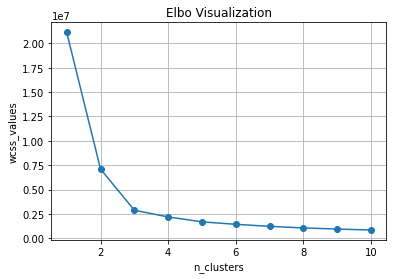

In [42]:
# create elbo visualization for easily find cluster
plt.plot(range(1,11),wcss_list,"o-")
plt.title("Elbo Visualization")
plt.xlabel("n_clusters")
plt.ylabel("wcss_values")
plt.grid()
plt.show()

In [43]:
# fit model 
model= KMeans(n_clusters=3)
pred=model.fit_predict(data_t)

pred[:5]

array([0, 1, 2, 1, 2], dtype=int32)

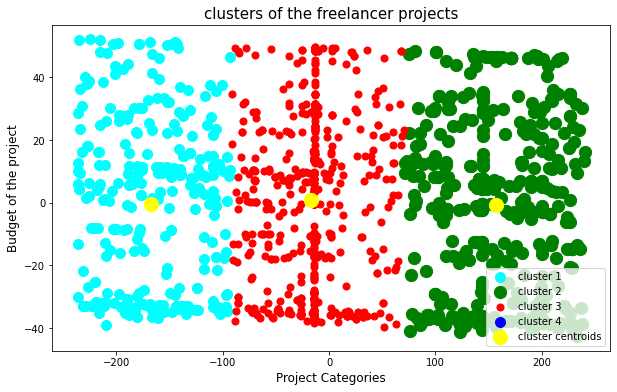

In [44]:
# plot cluster 
plt.figure(figsize = (10,6))
plt.scatter(data_t[pred==0,0], data_t[pred== 0,1], s = 100, c= "cyan", label = "cluster 1")
plt.scatter(data_t[pred==1,0], data_t[pred== 1,1], s = 150, c= "green", label = "cluster 2")
plt.scatter(data_t[pred==2,0], data_t[pred== 2,1], s = 50, c= "red", label = "cluster 3")
plt.scatter(data_t[pred==3,0], data_t[pred== 3,1], s = 100, c= "blue", label = "cluster 4")
plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],s=200,c="yellow",
            label="cluster centroids")
plt.xlabel("Project Categories",fontsize = 12)
plt.ylabel("Budget of the project",fontsize = 12)
plt.title("clusters of the freelancer projects", fontsize =15)
plt.legend(loc ="lower right")
plt.show()

# Regression model for Budget prediction

<AxesSubplot:>

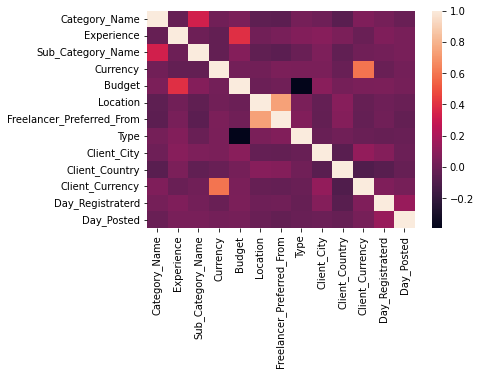

In [45]:
# now, before creating the model it is very important to check for multicolinearity
sns.heatmap(data.corr())

In [46]:
# As there is positive correlation between independent 
#variables we will delete one of them
data2=data.drop(data[["Currency","Category_Name"]], axis = 1)

In [47]:
data2.head()

,Experience,Sub_Category_Name,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_Registraterd,Day_Posted
0,0,85,4.472136,1,0,0,423,66,1,17,30
1,1,67,5.000000,1,0,1,14,66,1,5,30
2,0,21,5.477226,1,0,0,224,25,2,8,30
3,2,0,5.477226,1,0,0,160,66,1,2,30
4,0,85,4.472136,1,0,1,238,66,1,11,30


# Creating Model

In [48]:
# spliting of data into x and y
x = data2.iloc[:,[0,1,3,4,5,6,7,8,9,10]]
y = data2.iloc[:,2]

In [49]:
# spliting of data into training and testing 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [50]:
# import linear regression model 
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
ypred[:5]


array([ 3.39883875, 10.07251734, 12.4017395 ,  9.77291176,  9.83979094])

In [52]:
ytest[:5]

303     3.162278
355    13.964240
452     2.449490
259     9.486833
789    10.723805
Name: Budget, dtype: float64

In [53]:
# import ResidualsPlot for observation 
from yellowbrick.regressor import ResidualsPlot

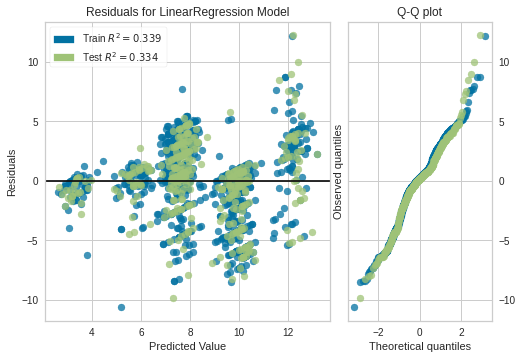

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [54]:
residuals_vis = ResidualsPlot(model,hist = False, qqplot = True)
residuals_vis.fit(xtrain,ytrain)
residuals_vis.score(xtest,ytest)
residuals_vis.show()


In [55]:
# find  mean_absolute_error, mean_squared_error ,r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [56]:
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,ypred)


print(" mean_absolute_error-",mae)
print(" mean_squared_error-",mse)
print(" root mean squared error-",rmse)
print(" r2_score-",r2)

 mean_absolute_error- 2.263494777623792
 mean_squared_error- 9.538231744276375
 root mean squared error- 3.088402782066545
 r2_score- 0.33401651778615815


# CLASSIFICATION MODEL

In [57]:
# Now for predicting value of type column we will got classification
data2 = df.copy()

In [58]:
data2.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_Registraterd,Day_Posted
0,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,fixed_price,Tadcaster,United Kingdom,GBP,17,30
1,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,5.000000,remote,ALL,hourly,Ardrossan,United Kingdom,GBP,5,30
2,Writing & Translation,Entry ($),Content Writing,USD,5.477226,remote,ALL,fixed_price,Kolkata,India,USD,8,30
3,Design,Intermediate ($$),3D Design,GBP,5.477226,remote,ALL,fixed_price,Gloucester,United Kingdom,GBP,2,30
4,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,hourly,Leeds,United Kingdom,GBP,11,30


In [59]:
tp = data2["Type"].copy()
data2 = data2.drop(df[["Type","Day_Posted","Day_Registraterd"]], axis = 1)

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tp_encoded = encoder.fit_transform(tp)
cat_data = pd.get_dummies(data2)
cat_data.head()

,Budget,Category_Name_Business,Category_Name_Design,Category_Name_Digital Marketing,"Category_Name_Marketing, Branding & Sales",Category_Name_Music & Audio,Category_Name_Social Media,Category_Name_Technology & Programming,"Category_Name_Video, Photo & Image",Category_Name_Writing & Translation,...,Client_Country_Turkey,Client_Country_Uganda,Client_Country_United Arab Emirates,Client_Country_United Kingdom,Client_Country_United States,Client_Country_Venezuela,Client_Country_Viet Nam,Client_Currency_EUR,Client_Currency_GBP,Client_Currency_USD
0,4.472136,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,5.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,5.477226,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5.477226,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4.472136,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [61]:
x = cat_data

In [62]:
y = tp_encoded
y[:5]

array([0, 1, 0, 0, 1])

In [63]:
# spliting of data into training and testing 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
trainac=[]
testac=[]

for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    trainac.append(train)
    testac.append(test)

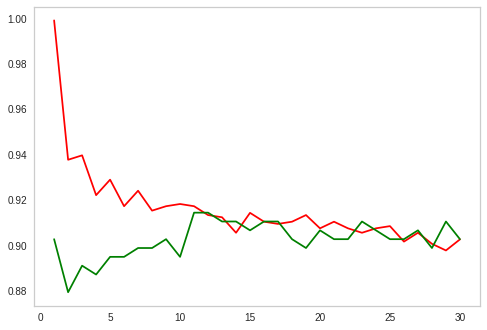

In [66]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="green")
plt.grid()
plt.show()

In [67]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [68]:
#find accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(ac)
print(cm)
print(cr)

0.914396887159533
[[212   2]
 [ 20  23]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       214
           1       0.92      0.53      0.68        43

    accuracy                           0.91       257
   macro avg       0.92      0.76      0.81       257
weighted avg       0.91      0.91      0.90       257



In [69]:
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(train,test)

0.9172346640701071 0.914396887159533


 As accuracy score our model is 92% accurate it means it is perform well

# Decision Tree

In [70]:
# import libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [71]:
# create fun for return model
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print(classification_report(ytest,ypred))
  return model

In [72]:
dt=DecisionTreeClassifier()

In [73]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       214
           1       0.82      0.74      0.78        43

    accuracy                           0.93       257
   macro avg       0.89      0.86      0.87       257
weighted avg       0.93      0.93      0.93       257



DecisionTreeClassifier()

In [74]:
dt.score(xtrain,ytrain)

0.9990262901655307

In [75]:
dt.score(xtest,ytest)

0.9299610894941635

In [76]:
dt1=DecisionTreeClassifier(max_depth=6)
print(mymodel(dt1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       214
           1       0.88      0.53      0.67        43

    accuracy                           0.91       257
   macro avg       0.90      0.76      0.81       257
weighted avg       0.91      0.91      0.90       257

DecisionTreeClassifier(max_depth=6)


In [77]:
dt2=DecisionTreeClassifier(min_samples_leaf=20)
print(mymodel(dt2))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       214
           1       0.86      0.56      0.68        43

    accuracy                           0.91       257
   macro avg       0.89      0.77      0.81       257
weighted avg       0.91      0.91      0.90       257

DecisionTreeClassifier(min_samples_leaf=20)


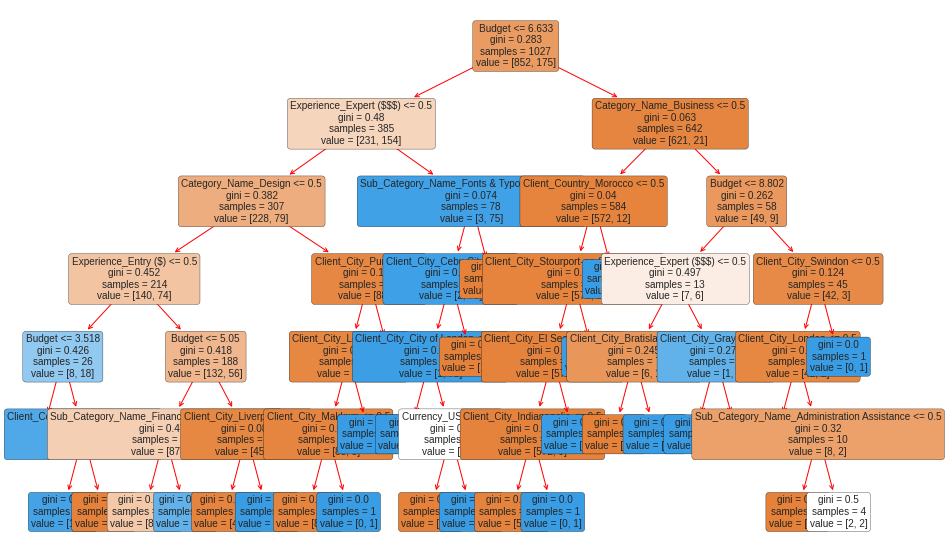

In [78]:
# plot decision tree fig
from sklearn import tree
fig,ax=plt.subplots(figsize=(15,10))
chart=tree.plot_tree(dt1,
                     feature_names=x.columns,
                     fontsize=10,
                     filled=True,
                     rounded=True)
for node in chart:
  arrow=node.arrow_patch
  if(arrow is not None):
    arrow.set_edgecolor("red")
    arrow.set_linewidth(1)